In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import gc
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [92]:
data_root1 = '../A榜数据/主表数据/'
data_root2 = '../A榜数据/其他数据表/'

# 主表

In [93]:
train = pd.read_csv(data_root1 + 'x_train.csv')
test = pd.read_csv(data_root1 + 'x_test.csv')
test['y'] = -1
train_label = pd.read_csv(data_root1 + 'y_train.csv')
train = train.merge(train_label, on='id', how='left')

test.rename(columns={'c2':'a2','c3':'a3'}, inplace=True)
df = pd.concat([train,test],axis=0).reset_index(drop=True)

In [94]:
train['month'] = train['a3'].apply(lambda x: x.split('-')[1]).astype('int32')

## Groupby 理解
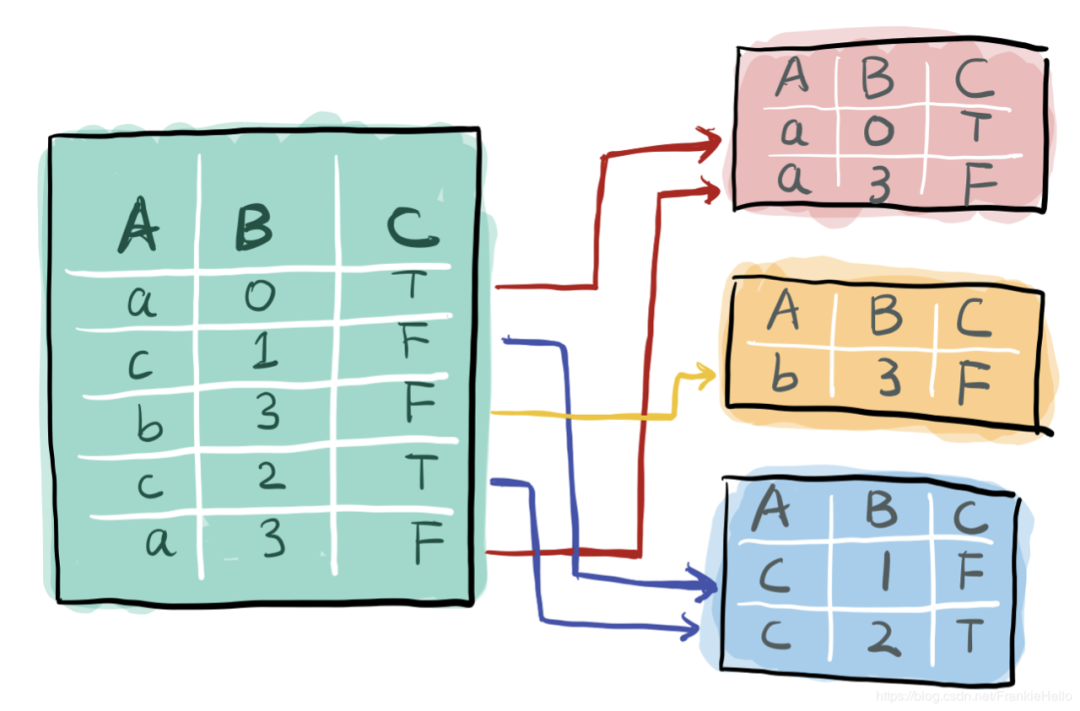

In [134]:
#每月平均购买率
train.groupby('month').agg(label_mean=('y','mean'),
                          month_count=('y','count'),
                          buy_count=('y',lambda x:sum(x)))

,label_mean,month_count,buy_count
month,,,
7,0.013304,752453,10011
8,0.012900,581916,7507
9,0.007526,1051764,7916


In [135]:
#每月平均购买率
train.groupby('month').agg(label_mean=('y','mean'),
                          month_count=('y','count'),
                          buy_count=('y',lambda x:sum(x))).reset_index()

,month,label_mean,month_count,buy_count
0,7,0.013304,752453,10011
1,8,0.012900,581916,7507
2,9,0.007526,1051764,7916


In [136]:
#每月平均购买率
train.groupby('month').agg(label_mean=('y','mean'),
                          month_count=('y','count'),
                          buy_count=('y',lambda x:sum(x))).reset_index(drop=True)

,label_mean,month_count,buy_count
0,0.013304,752453,10011
1,0.012900,581916,7507
2,0.007526,1051764,7916


In [96]:
user_label_df = train.groupby(['core_cust_id','month']).agg(user_label_mean=('y','mean'),
                                                           user_count=('y','count')).reset_index()

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_label_mean', ylabel='Density'>

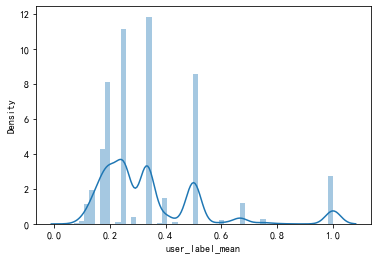

In [97]:
sns.distplot(user_label_df.query('user_label_mean>0')['user_label_mean'])

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_count', ylabel='Density'>

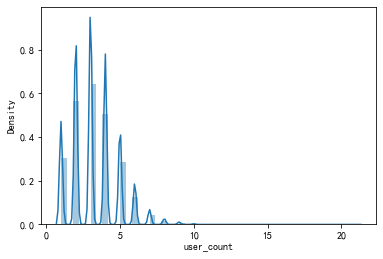

In [98]:
sns.distplot(user_label_df['user_count'])

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wk\A

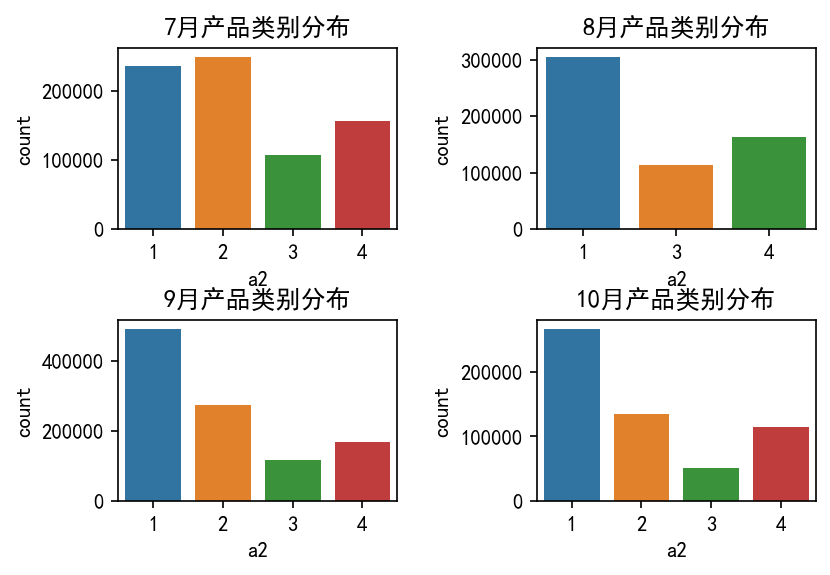

In [99]:
#7,8,9月的产品类别与10月的产品类别分布
plt.figure(dpi=150)
plt.subplot(2,2,1)
sns.countplot(train.query('month==7')['a2'])
plt.title('7月产品类别分布')
plt.subplot(2,2,2)
sns.countplot(train.query('month==8')['a2'])
plt.title('8月产品类别分布')
plt.subplot(2,2,3)
sns.countplot(train.query('month==9')['a2'])
plt.title('9月产品类别分布')
plt.subplot(2,2,4)
sns.countplot(test['a2'])
plt.title('10月产品类别分布')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

# 副表
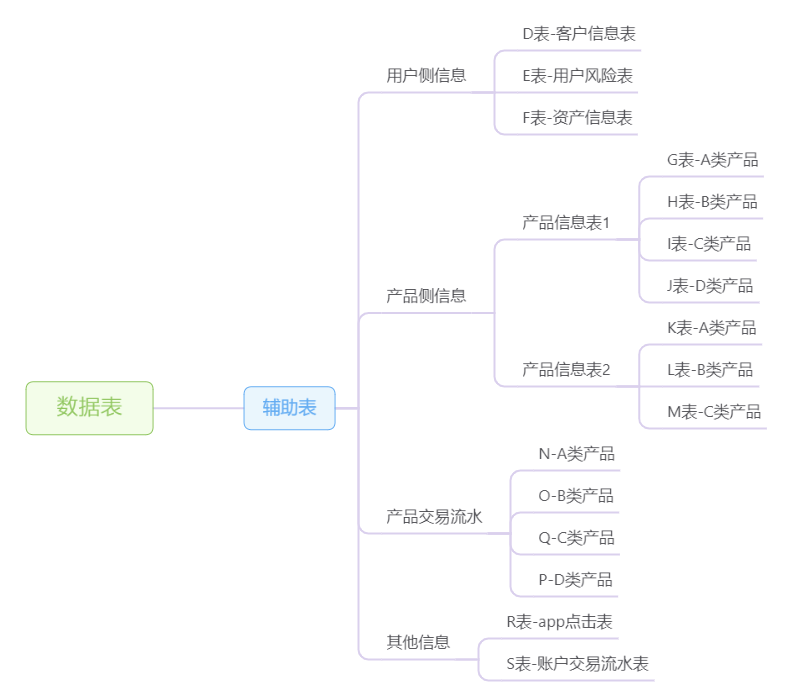

## 1.D表-客户信息表

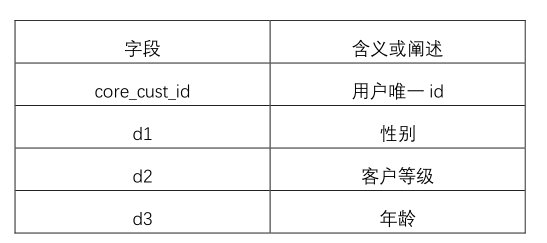

In [132]:
d = pd.read_csv(data_root2+'d.csv')

In [133]:
len(set(d['core_cust_id']) & set(df['core_cust_id'])) / df['core_cust_id'].nunique()

1.0

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

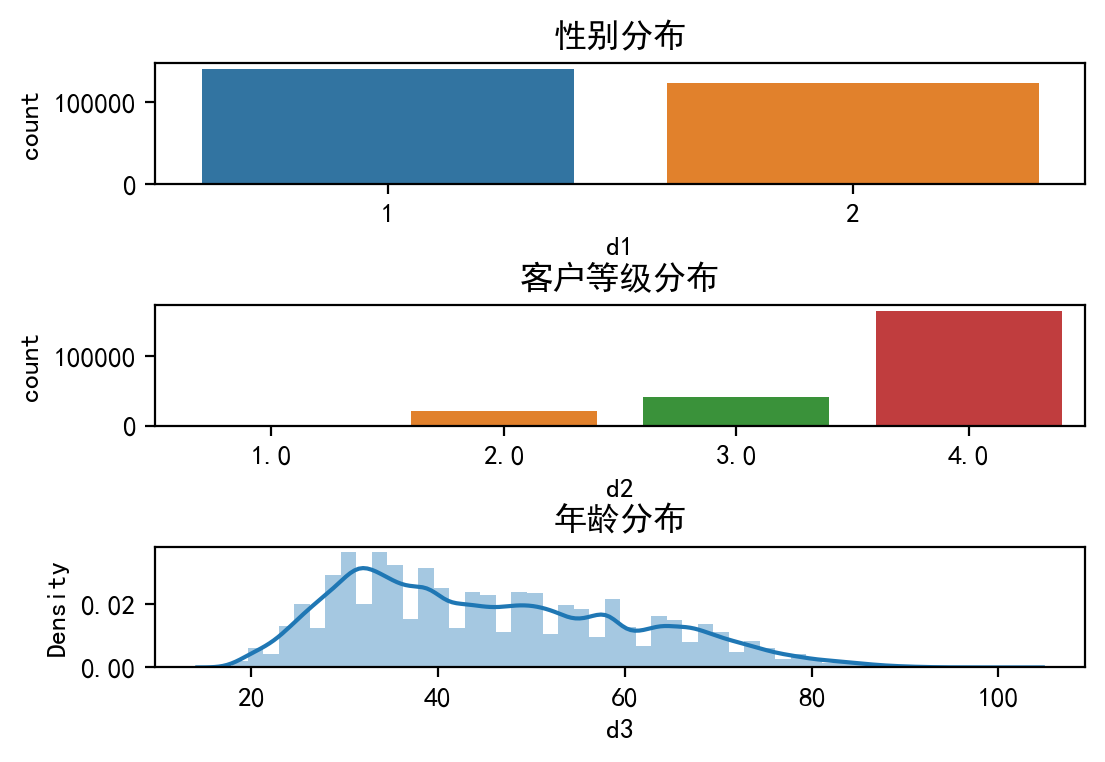

In [101]:
#性别
plt.figure(dpi=200)

plt.subplot(3,1,1)
plt.title('性别分布')
sns.countplot(d['d1'])

plt.subplot(3,1,2)
plt.title('客户等级分布')
sns.countplot(d['d2'])

plt.subplot(3,1,3)
plt.title('年龄分布')
sns.distplot(d['d3'])

plt.subplots_adjust(wspace=0.5,hspace=1)

In [102]:
del d
gc.collect()

913214

## 2.E表-用户风险表
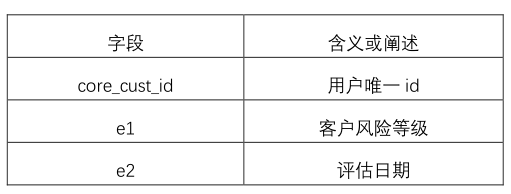

In [103]:
e = pd.read_csv(data_root2+'e.csv')

In [104]:
e.head()

,core_cust_id,e1,e2
0,d4931873cb,3,20200608
1,af52580627,3,20200330
2,cfeaff22c6,1,20200426
3,a15a0e01ea,2,20191010
4,7c72b6e583,2,20210809


In [105]:
e['month'] = e['e2'].apply(lambda x: int(str(x)[4:6]))
e['year'] = e['e2'].apply(lambda x:int(str(x)[0:4]))

In [106]:
e['year'].unique()

array([2020, 2019, 2021, 2018, 2016, 2017, 2014, 2015, 2013], dtype=int64)

In [107]:
e['month'].unique()

array([ 6,  3,  4, 10,  8,  7,  5, 12,  9,  1,  2, 11], dtype=int64)

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'风险等级分布'}, xlabel='e1', ylabel='Density'>

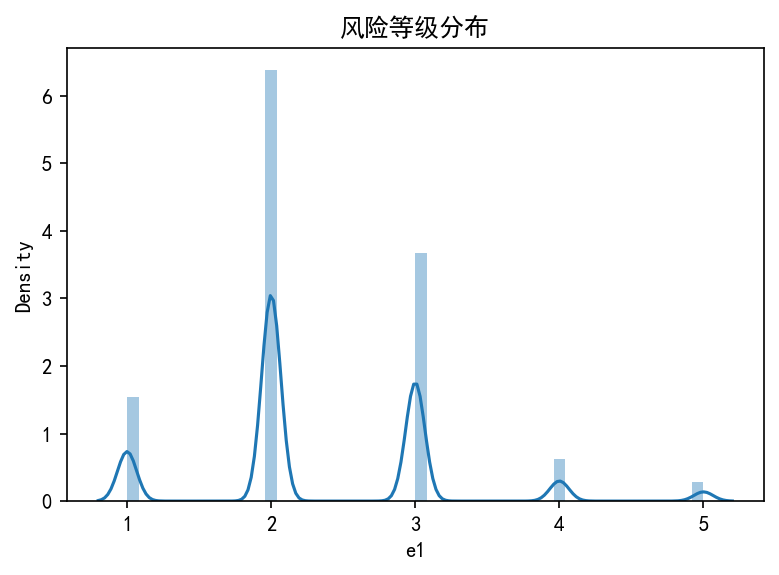

In [108]:
plt.figure(dpi=150)
plt.title('风险等级分布')
sns.distplot(e['e1'])

In [109]:
e_2021 = e.query('year==2021 & month>=7').reset_index(drop=True)

In [110]:
e_2021.groupby('month').agg(e1_mean=('e1','mean')).reset_index()

,month,e1_mean
0,7,2.270565
1,8,2.379093
2,9,2.341552


In [111]:
temp_df = e_2021.groupby('core_cust_id').agg(user_count=('e1','count')).reset_index()

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'7,8,9月份用户评估次数分布'}, xlabel='user_count', ylabel='count'>

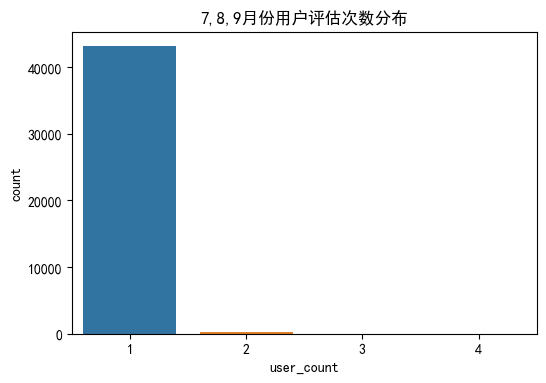

In [112]:
#在7，8，9月中用户被评估次数分布
plt.figure(dpi=100)
plt.title('7,8,9月份用户评估次数分布')
sns.countplot(temp_df['user_count'])

In [113]:
#2021年用户风险评估覆盖率
for start_month in [1,2,3,4,5,6,7,8]:
    e_temp = e.query('year==2021 & month>@start_month').reset_index()
    common_rate = len(set(e_temp['core_cust_id'].unique()) & set(df['core_cust_id'].unique())) / df['core_cust_id'].nunique()
    print(f'{start_month}->9 用户覆盖率为:{common_rate*100}%')

1->9 用户覆盖率为:18.28785669652156%
2->9 用户覆盖率为:16.598057222927043%
3->9 用户覆盖率为:14.12773853931946%
4->9 用户覆盖率为:11.209407131090114%
5->9 用户覆盖率为:8.654636344700913%
6->9 用户覆盖率为:6.120315843290223%
7->9 用户覆盖率为:3.6197004411959632%
8->9 用户覆盖率为:1.5799738690803051%


## 3.F表-资产信息表
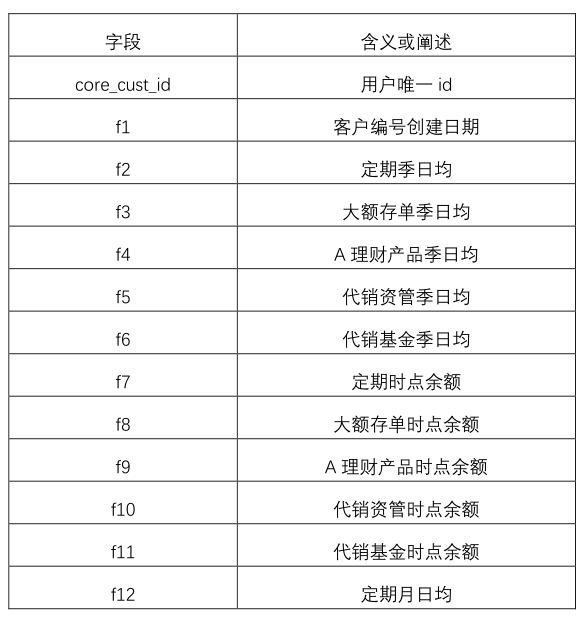
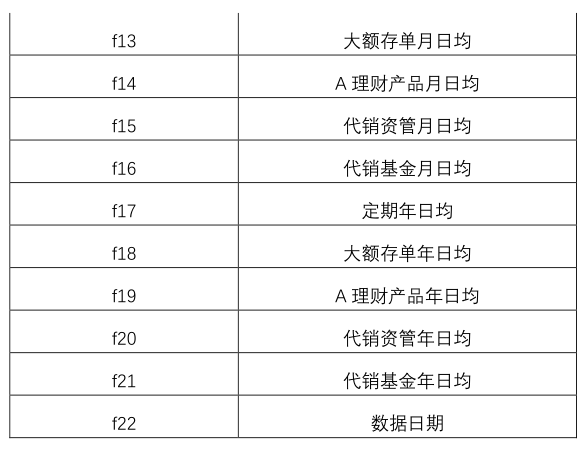

In [114]:
f = pd.read_csv(data_root2+'f.csv')

In [115]:
f['month'] = f['f22'].apply(lambda x: int(str(x)[4:6]))

In [116]:
f['month'].unique()

array([8, 7, 6, 9], dtype=int64)

In [117]:
#数据处理
for c in ['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
          'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16',
          'f17', 'f18', 'f19','f20', 'f21']:
    f[c] = f[c].apply(lambda x: str(x).replace(',','')).astype('float')  

In [118]:
f.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038596 entries, 0 to 1038595
Data columns (total 24 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   core_cust_id  1038596 non-null  object 
 1   f1            1038596 non-null  object 
 2   f2            97285 non-null    float64
 3   f3            102669 non-null   float64
 4   f4            53939 non-null    float64
 5   f5            25147 non-null    float64
 6   f6            24650 non-null    float64
 7   f7            97285 non-null    float64
 8   f8            102669 non-null   float64
 9   f9            53939 non-null    float64
 10  f10           25147 non-null    float64
 11  f11           24650 non-null    float64
 12  f12           97285 non-null    float64
 13  f13           102669 non-null   float64
 14  f14           53939 non-null    float64
 15  f15           25147 non-null    float64
 16  f16           24650 non-null    float64
 17  f17           97285 non-nul

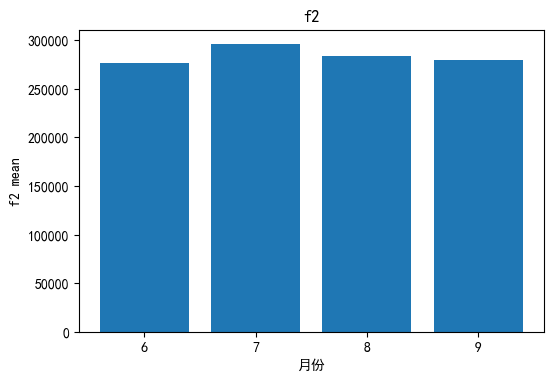

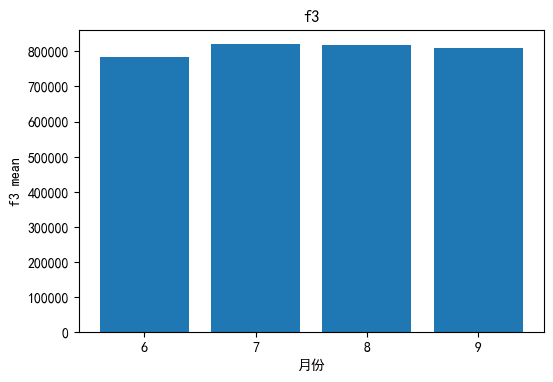

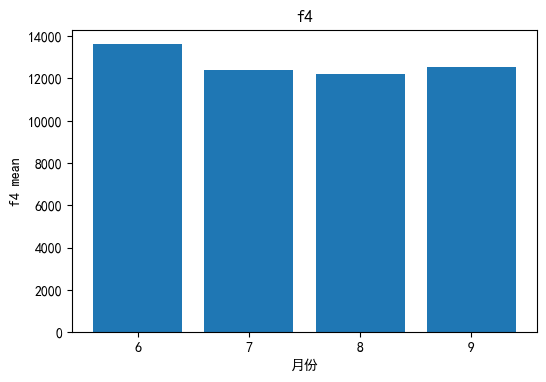

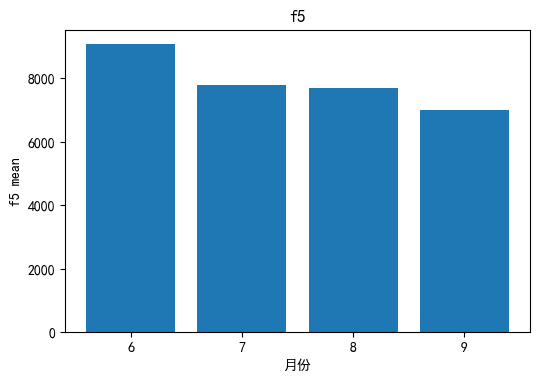

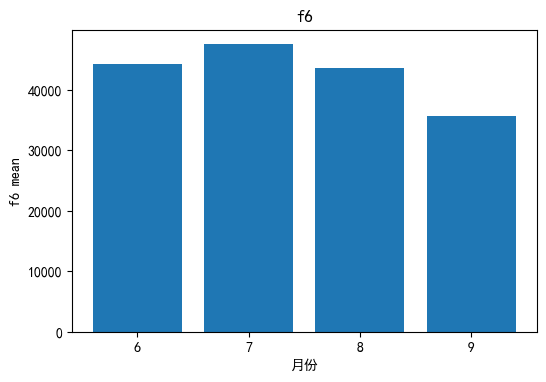

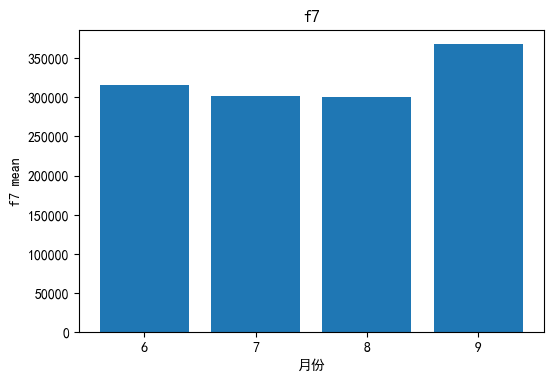

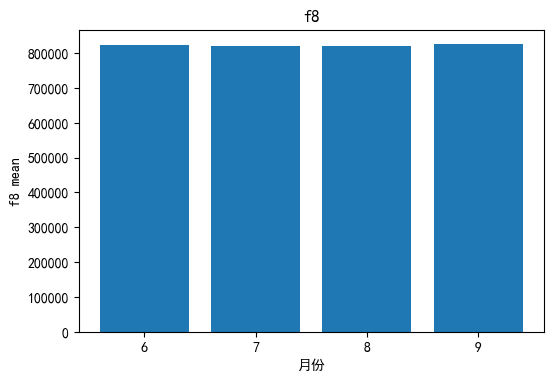

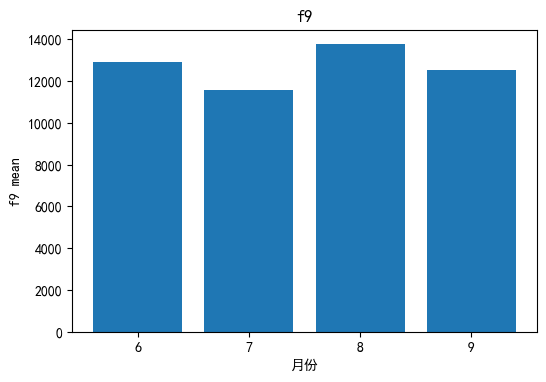

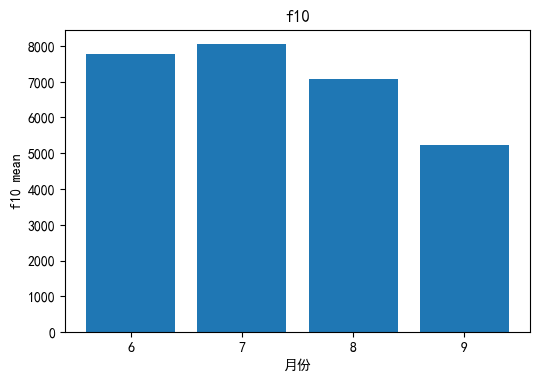

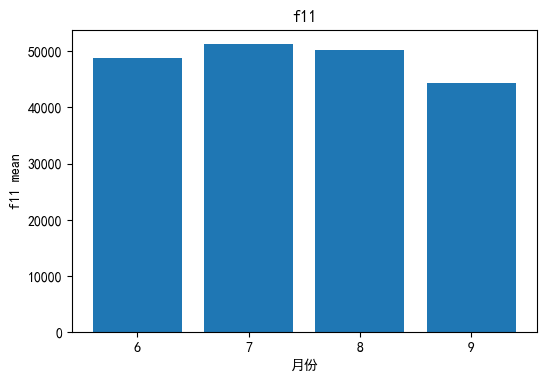

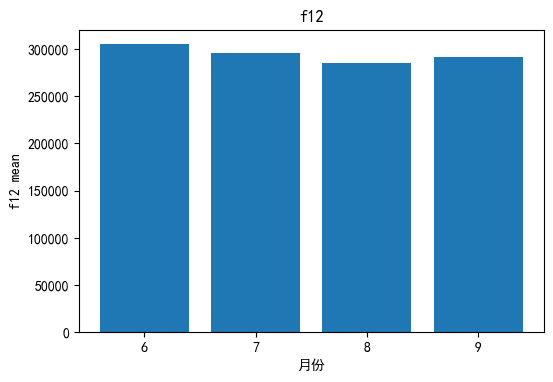

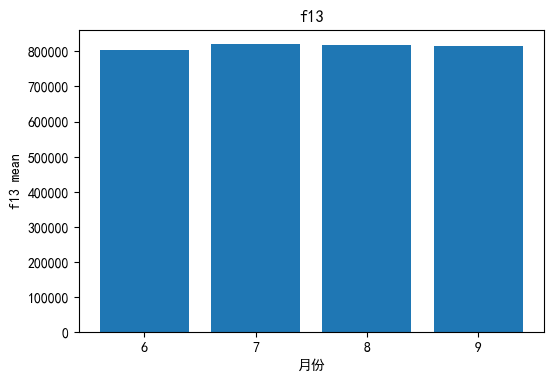

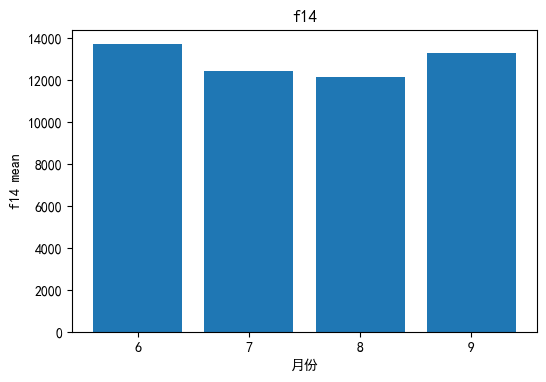

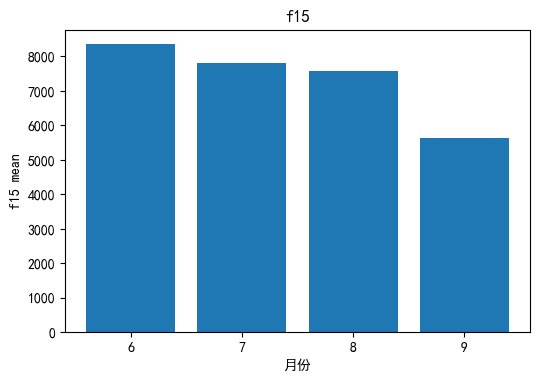

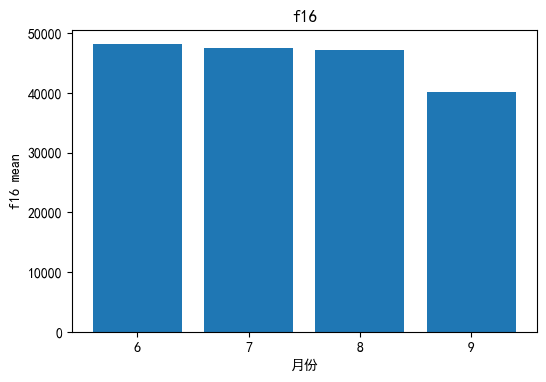

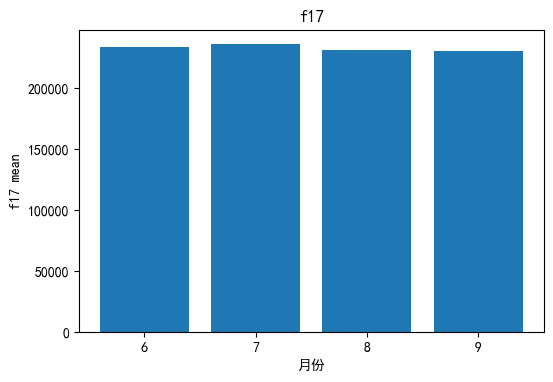

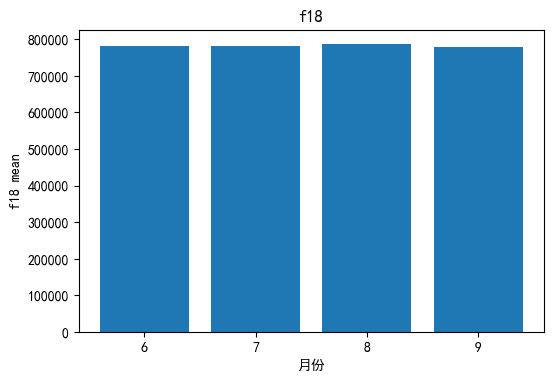

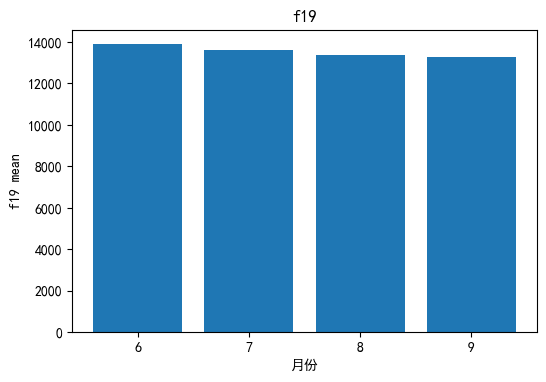

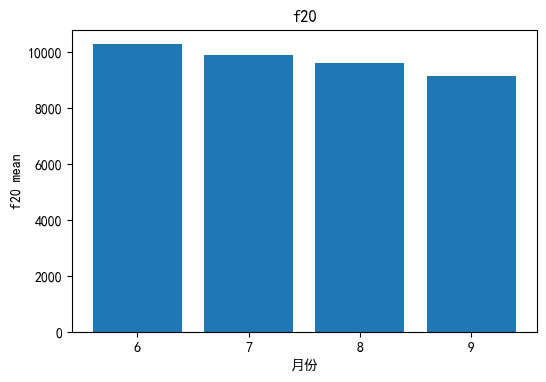

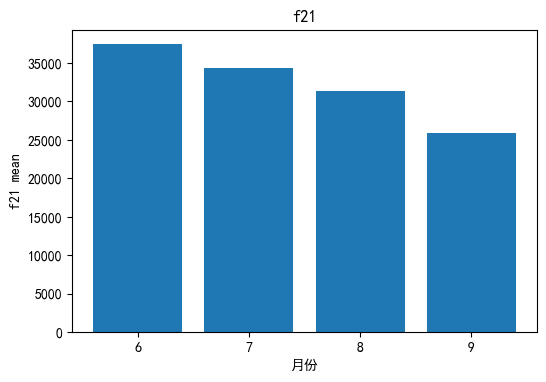

In [119]:
#每个月各个资金的均值分布对比
for c in ['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
          'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16',
          'f17', 'f18', 'f19','f20', 'f21']:
    temp_df = f.groupby('month').agg(f_mean=(c,'mean')).reset_index()
    plt.figure(dpi=100)
    plt.bar(x = temp_df['month'].astype('str'), height = temp_df['f_mean'])
    plt.title(f'{c}')
    plt.xlabel('月份')
    plt.ylabel(f'{c} mean')
    plt.show()

In [120]:
del f
gc.collect()

17248

## 4.G,H,I,J表-理财产品表1
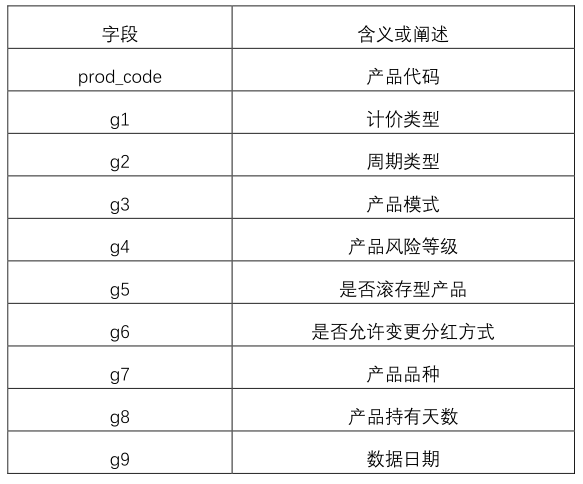

- 这四张表都属于产品表1
- 这四张表的特征名字不是一一对应的，这里仅展示了G表的特征名

In [121]:
g = pd.read_csv(data_root2+'g.csv')
h = pd.read_csv(data_root2+'h.csv')
i = pd.read_csv(data_root2+'i.csv')
j = pd.read_csv(data_root2+'j.csv')

A类产品个数:6557
A类产品在7月数据中的产品占比:74.44444444444444%

B类产品个数:2696
B类产品在7月数据中的产品占比:2.2222222222222223%

C类产品个数:129
C类产品在7月数据中的产品占比:16.666666666666664%

D类产品个数:231
D类产品在7月数据中的产品占比:6.666666666666667%



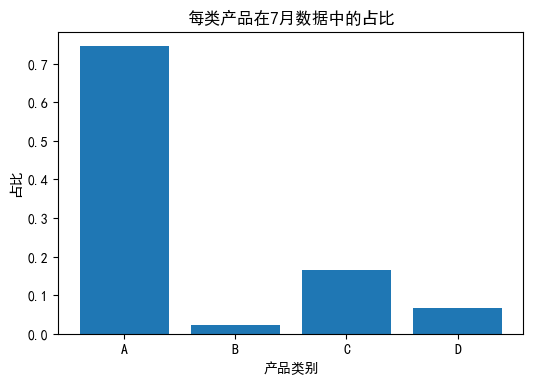

A类产品个数:6557
A类产品在8月数据中的产品占比:74.44444444444444%

B类产品个数:2696
B类产品在8月数据中的产品占比:2.2222222222222223%

C类产品个数:129
C类产品在8月数据中的产品占比:16.666666666666664%

D类产品个数:231
D类产品在8月数据中的产品占比:6.666666666666667%



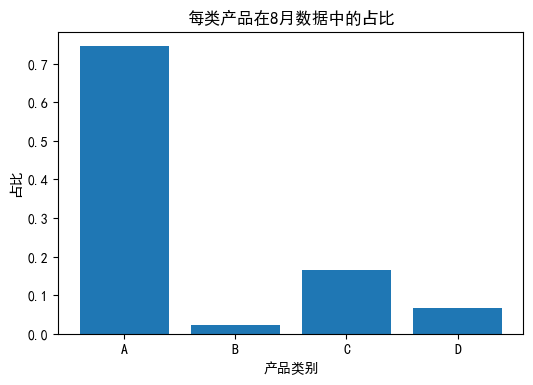

A类产品个数:6557
A类产品在9月数据中的产品占比:74.44444444444444%

B类产品个数:2696
B类产品在9月数据中的产品占比:2.2222222222222223%

C类产品个数:129
C类产品在9月数据中的产品占比:16.666666666666664%

D类产品个数:231
D类产品在9月数据中的产品占比:6.666666666666667%



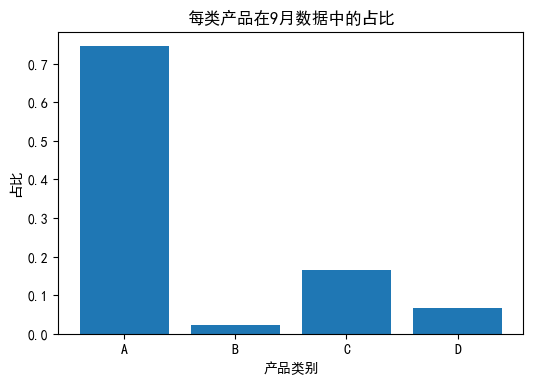

In [125]:
table_name = ['A','B','C','D']
common_rate_list = []
for month in [7,8,9]:
    for idx,temp_df in enumerate([g,h,i,j]):
        common_rate = len(set(temp_df['prod_code']) & set(train['prod_code'])) / train['prod_code'].nunique()
        common_rate_list.append(common_rate)
        print('{}类产品个数:{}'.format(table_name[idx],temp_df['prod_code'].nunique()))
        print('{}类产品在{}月数据中的产品占比:{}%'.format(table_name[idx],month,common_rate*100))
        print()
    #每类产品在原始数据中的占比
    plt.figure(dpi=100)
    plt.bar(x=table_name,height=common_rate_list)
    plt.title(f'每类产品在{month}月数据中的占比')
    plt.xlabel('产品类别')
    plt.ylabel('占比')
    plt.show()
    common_rate_list = []

A类产品个数:6557
A类产品在测试数据中的产品占比:72.54901960784314%

B类产品个数:2696
B类产品在测试数据中的产品占比:3.9215686274509802%

C类产品个数:129
C类产品在测试数据中的产品占比:13.725490196078432%

D类产品个数:231
D类产品在测试数据中的产品占比:9.803921568627452%



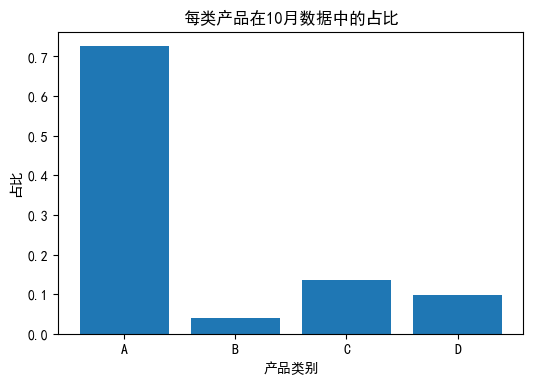

In [128]:
table_name = ['A','B','C','D']
common_rate_list = []
for idx,temp_df in enumerate([g,h,i,j]):
    common_rate = len(set(temp_df['prod_code']) & set(test['prod_code'])) / test['prod_code'].nunique()
    common_rate_list.append(common_rate)
    print('{}类产品个数:{}'.format(table_name[idx],temp_df['prod_code'].nunique()))
    print('{}类产品在测试数据中的产品占比:{}%'.format(table_name[idx],common_rate*100))
    print()
#每类产品在原始数据中的占比
plt.figure(dpi=100)
plt.bar(x=table_name,height=common_rate_list)
plt.title('每类产品在10月数据中的占比')
plt.xlabel('产品类别')
plt.ylabel('占比')
plt.show()

In [130]:
#所有产品都能在产品表1中覆盖到
np.sum(common_rate_list)

0.9999999999999999

In [131]:
#考虑每张产品表1的对应描述的特征是否一致
#这里给了一个例子
table_name = ['A','B','C','D']
# cols_name = ['g2','h2','i2','j2']
cols_name = ['g3','h3','i3','j3']
common_rate_list = []
for idx,temp_df in enumerate([g,h,i,j]):
    print('{}表的{}特征的取值范围为:{}'.format(table_name[idx],cols_name[idx],temp_df[cols_name[idx]].unique()))

A表的g3特征的取值范围为:[1]
B表的h3特征的取值范围为:[1 2]
C表的i3特征的取值范围为:[2 1]
D表的j3特征的取值范围为:[ 6. nan  1.  5.]


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


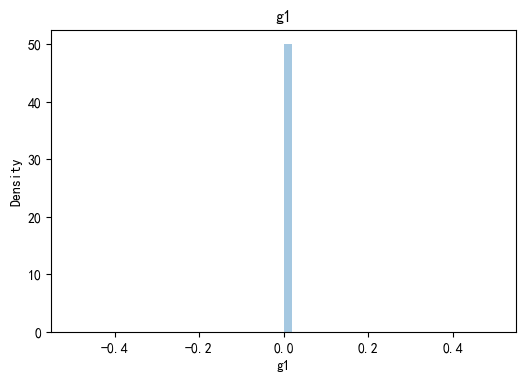

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


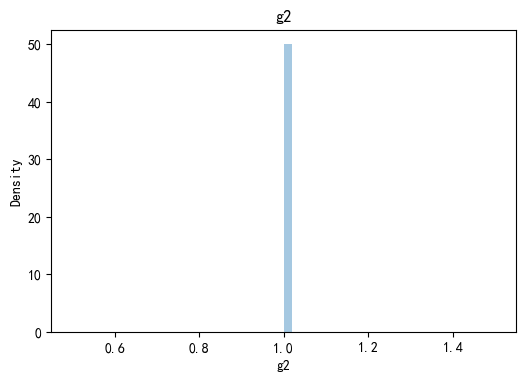

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


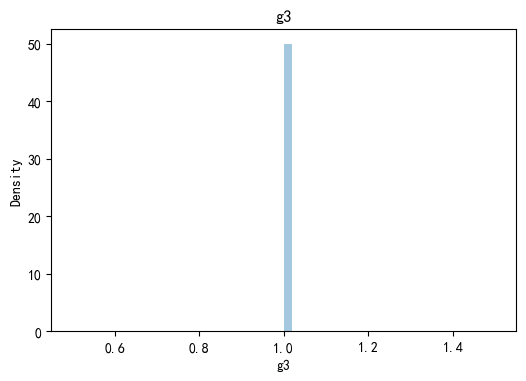

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


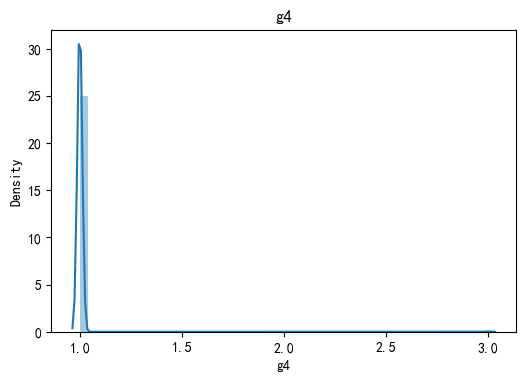

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


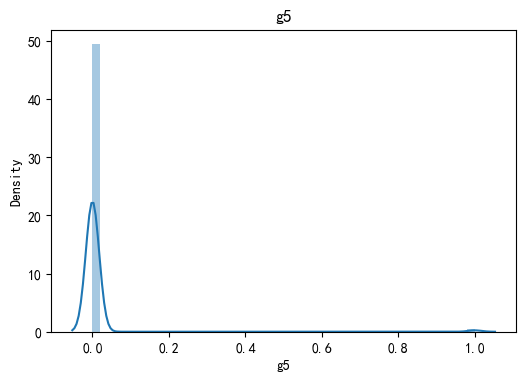

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


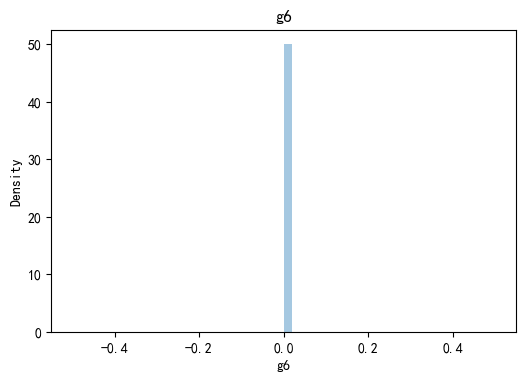

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


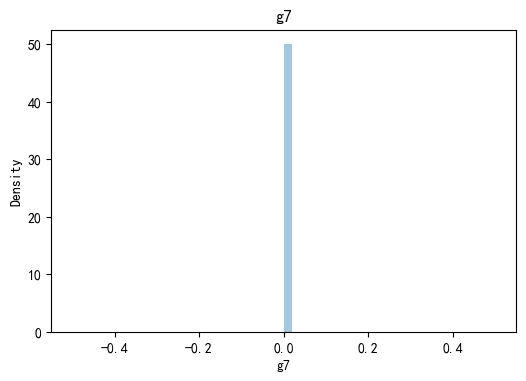

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


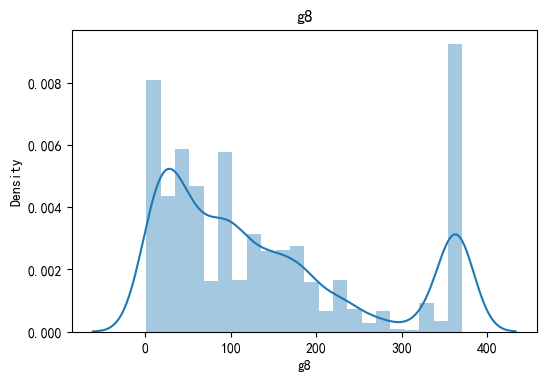

In [36]:
#着重分析A类产品
for col in g.columns:
    if col in ['prod_code','g9']:
        continue
    plt.figure(dpi=100)
    sns.distplot(g[col])
    plt.title(col)
    plt.show()

## 5.K,L,M表-理财产品表2
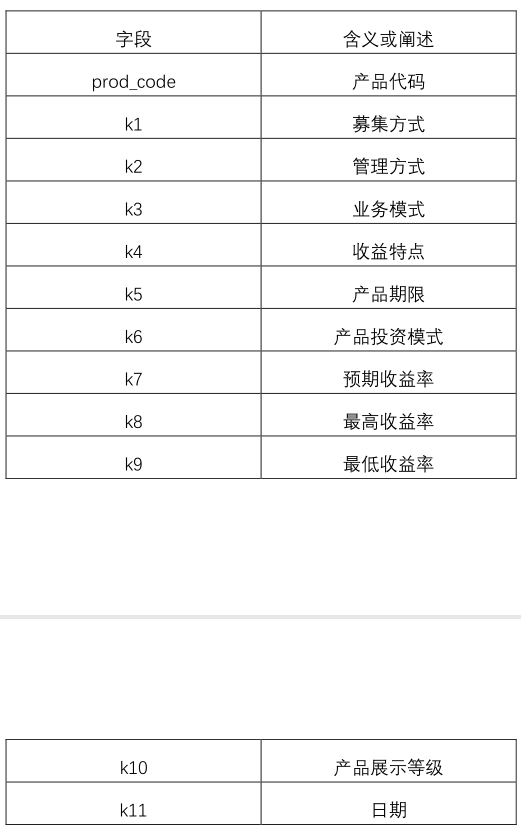

In [37]:
k = pd.read_csv(data_root2+'k.csv')
l = pd.read_csv(data_root2+'l.csv')
m = pd.read_csv(data_root2+'m.csv')

In [38]:
table_name = ['A','B','C']
common_rate_list = []
for idx,temp_df in enumerate([k,l,m]):
    common_rate = len(set(temp_df['prod_code']) & set(df['prod_code'])) / df['prod_code'].nunique()
    common_rate_list.append(common_rate)
    print('{}类产品个数:{}'.format(table_name[idx],temp_df['prod_code'].nunique()))
    print('{}类产品在训练数据中的产品占比:{}%'.format(table_name[idx],common_rate*100))
    print()

A类产品个数:22874
A类产品在训练数据中的产品占比:80.62015503875969%

B类产品个数:3002
B类产品在训练数据中的产品占比:1.550387596899225%

C类产品个数:129
C类产品在训练数据中的产品占比:11.627906976744185%



In [39]:
#考虑每张产品表1的对应描述的特征是否一致
#这里给了一个例子
table_name = ['A','B','C']
cols_name = ['k3','l3','m3']
# cols_name = ['k2','l2','m2']
common_rate_list = []
for idx,temp_df in enumerate([k,l,m]):
    print('{}表的{}特征的取值范围为:{}'.format(table_name[idx],cols_name[idx],temp_df[cols_name[idx]].unique()))

A表的k3特征的取值范围为:[nan  1.]
B表的l3特征的取值范围为:[ 3.  1. nan]
C表的m3特征的取值范围为:[nan]


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


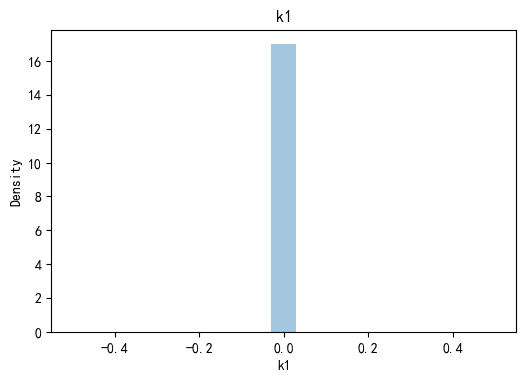

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


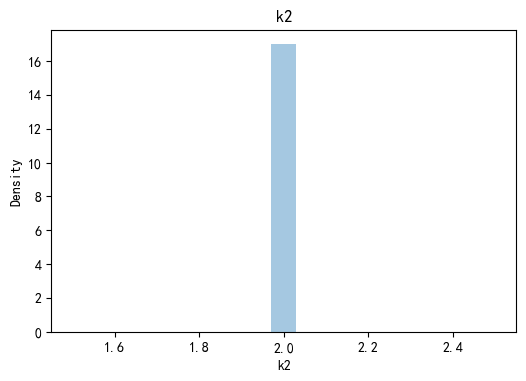

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


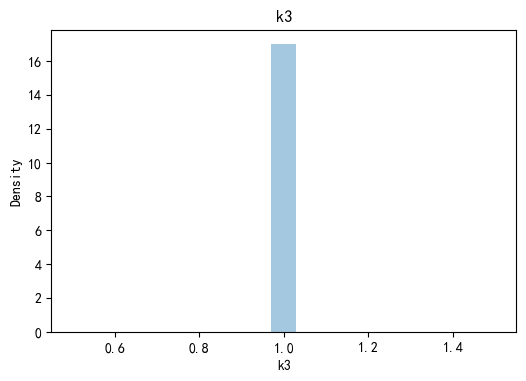

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


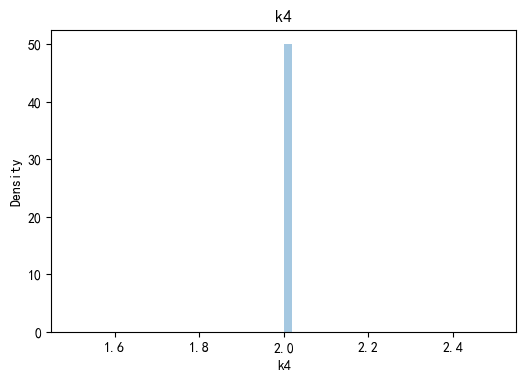

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


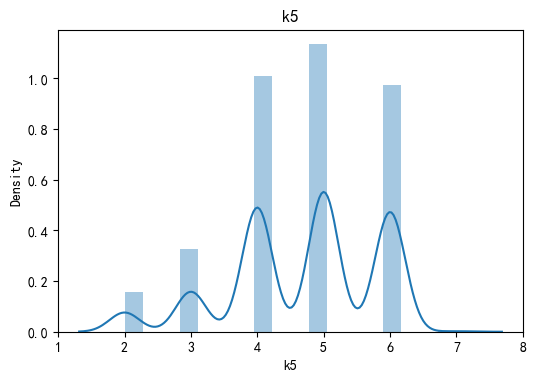

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


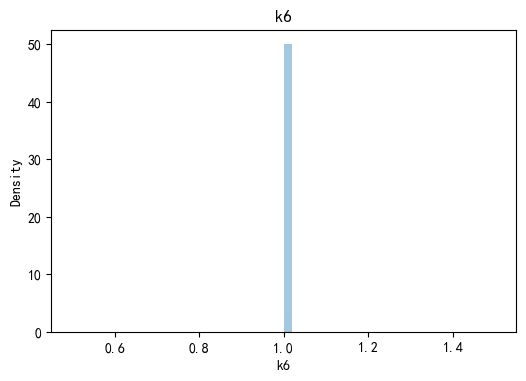

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


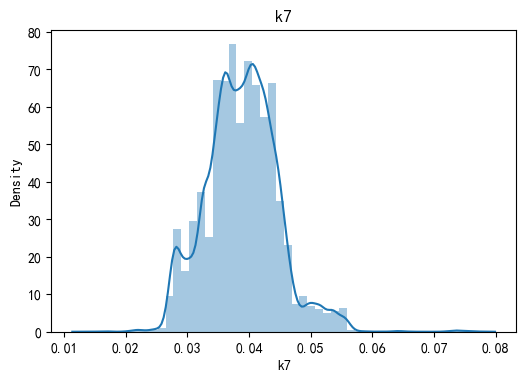

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


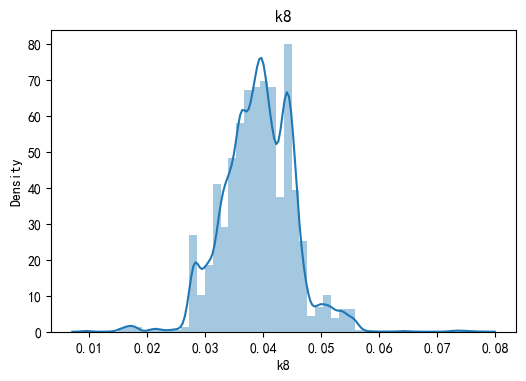

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


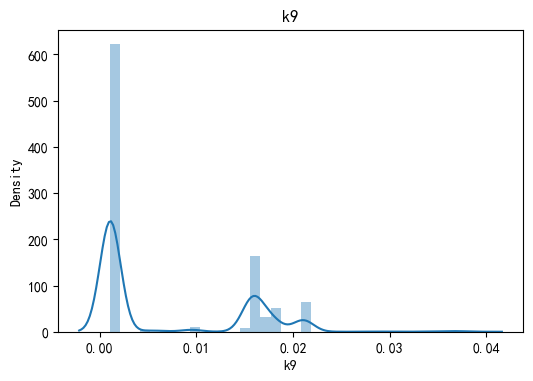

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


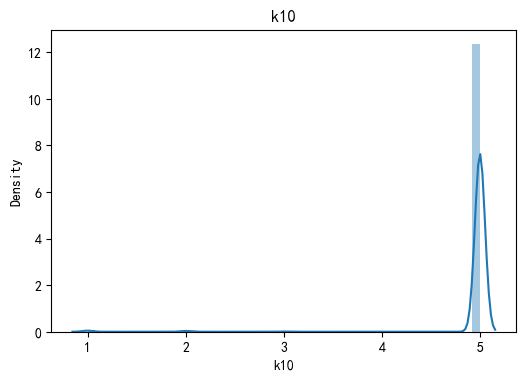

In [40]:
#着重分析A类产品
for col in k.columns:
    if col in ['prod_code','k11']:
        continue
    plt.figure(dpi=100)
    sns.distplot(k[col])
    plt.title(col)
    plt.show()

## 6.N,O,P,Q表-产品交易流水表
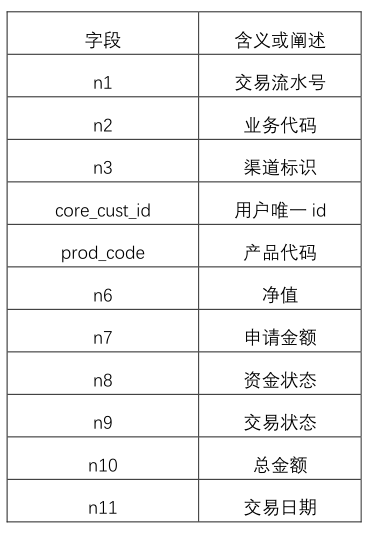

In [41]:
n = pd.read_csv(data_root2+'n.csv') #A
o = pd.read_csv(data_root2+'o.csv') #B
q = pd.read_csv(data_root2+'q.csv') #C
p = pd.read_csv(data_root2+'p.csv') #D

In [42]:
table_name = ['A','B','C','D']
common_rate_list = []
for idx,temp_df in enumerate([n,o,q,p]):
    common_rate = len(set(temp_df['prod_code']) & set(df['prod_code'])) / df['prod_code'].nunique()
    common_rate_list.append(common_rate)
    print('{}类产品个数:{}'.format(table_name[idx],temp_df['prod_code'].nunique()))
    print('{}类产品在训练数据中的产品占比:{}%'.format(table_name[idx],common_rate*100))
    print()

A类产品个数:2575
A类产品在训练数据中的产品占比:72.86821705426357%

B类产品个数:112
B类产品在训练数据中的产品占比:1.550387596899225%

C类产品个数:29
C类产品在训练数据中的产品占比:10.852713178294573%

D类产品个数:94
D类产品在训练数据中的产品占比:6.2015503875969%



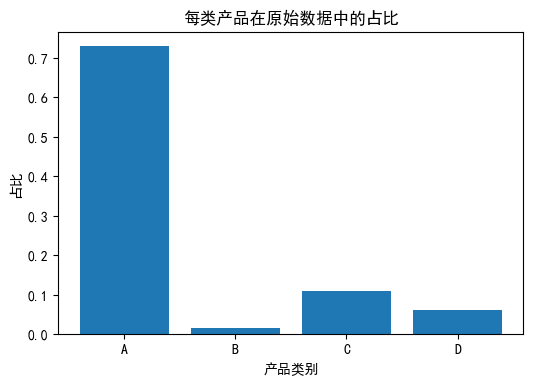

In [43]:
#每类产品在原始数据中的占比
plt.figure(dpi=100)
plt.bar(x=table_name,height=common_rate_list)
plt.title('每类产品在原始数据中的占比')
plt.xlabel('产品类别')
plt.ylabel('占比')
plt.show()

In [44]:
np.sum(common_rate_list)

0.9147286821705426

# 标签构造规则
## 正标签及交易时间定义：某一天（2021.7.1）的在售产品在未来一个表现期内（1个月）如果对应客户有购买，则为一条正样本，交易时间定为该天（即2021.7.1）。

## 负标签及交易时间定义：某一天（2021.7.1）在售产品在未来一个表现期内（1个月）如果对应客户没有购买，则为一条负样本，交易时间也定为该天（即2021.7.1）。


In [45]:
#以A类产品为例
n['month'] = n['n11'].apply(lambda x: int(str(x)[4:6]))

In [46]:
n['month'].unique()
#我们可以自己构造一些标签

array([1, 3, 4, 6, 8, 2, 7, 9, 5], dtype=int64)

In [47]:
n['n7'] = n['n7'].apply(lambda x:float(x.replace(',','')))

In [48]:
temp_df = n.groupby('month').agg(
                      n6_mean=('n6','mean'),
                      n7_mean=('n7','mean'),
                      n10_mean=('n10','mean'),
                      log_count=('n1','count')).reset_index()

In [49]:
temp_df

,month,n6_mean,n7_mean,n10_mean,log_count
0,1,1,112491.341904,0,108874
1,2,1,96273.211893,0,89550
2,3,1,156458.600662,0,100058
3,4,1,75791.414988,0,124825
4,5,1,106283.290465,0,103708
5,6,1,101911.725604,0,125829
6,7,1,105188.224913,0,124880
7,8,1,135636.796874,0,87168
8,9,1,92974.881795,0,84222


In [50]:
n['month'] = n['n11'].apply(lambda x: int(str(x)[4:6]))
o['month'] = o['o12'].apply(lambda x: int(str(x)[4:6]))
q['month'] = q['q10'].apply(lambda x: int(str(x)[4:6]))
p['month'] = p['p12'].apply(lambda x: int(str(x)[4:6]))

In [51]:
table_name = ['A','B','C','D']
for idx,temp_df in enumerate([n,o,q,p]):
    temp_df = temp_df.query('month>=7')
    for col in ['core_cust_id','prod_code']:
        common_rate = len(set(temp_df[col]) & set(df[col])) / df[col].nunique()
        print('{}表中的{}占原始数据的比例为:{}'.format(table_name[idx],col,common_rate))
    print()

A表中的core_cust_id占原始数据的比例为:0.12846566056314027
A表中的prod_code占原始数据的比例为:0.7286821705426356

B表中的core_cust_id占原始数据的比例为:0.029171952812860957
B表中的prod_code占原始数据的比例为:0.015503875968992248

C表中的core_cust_id占原始数据的比例为:0.0030448202079112305
C表中的prod_code占原始数据的比例为:0.10852713178294573

D表中的core_cust_id占原始数据的比例为:0.046376701823483746
D表中的prod_code占原始数据的比例为:0.06201550387596899



# 加数据，做特征，是否考虑不在主表中的user和item？

## 7.R表-app点击表
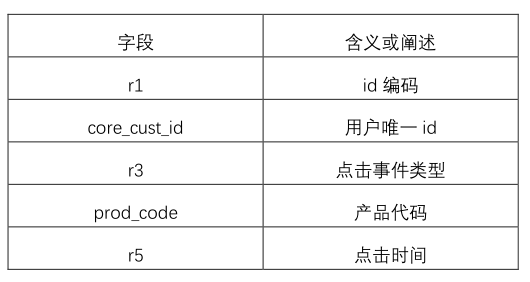

In [56]:
r = pd.read_csv(data_root2+'r.csv')

In [58]:
r['month'] = r['r5'].apply(lambda x : int(x.split('-')[1]))

In [60]:
r['month'].unique()

array([8, 5, 4, 2, 1, 7, 6], dtype=int64)

In [61]:
r.groupby('month').agg(log_count=('r1','count'))

,log_count
month,
1,50188
2,46752
4,132778
5,121269
6,139123
7,137029
8,149936


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


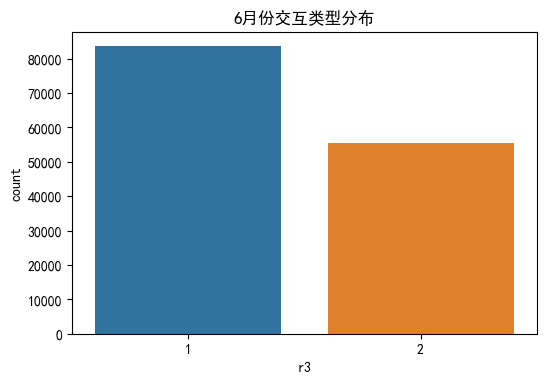

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    0.601036
2    0.398964
Name: r3, dtype: float64


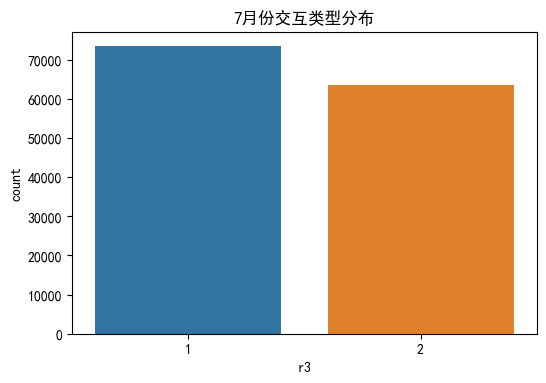

1    0.536478
2    0.463522
Name: r3, dtype: float64


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


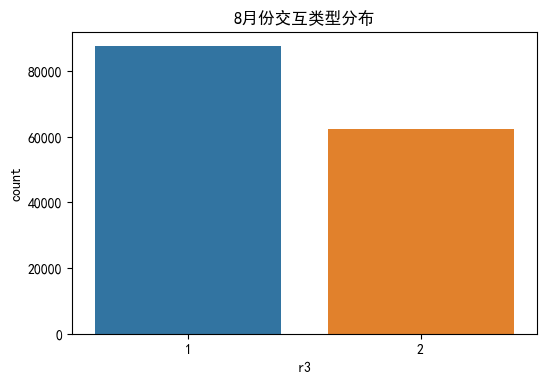

1    0.583802
2    0.416198
Name: r3, dtype: float64


In [64]:
for month in [6,7,8]:
    temp_df = r.query('month==@month').reset_index(drop=True)
    plt.figure(dpi=100)
    sns.countplot(temp_df['r3'])
    plt.title(f'{month}月份交互类型分布')
    plt.show()
    print(temp_df['r3'].value_counts()/len(temp_df))

## 8.S表-账户交易流水表
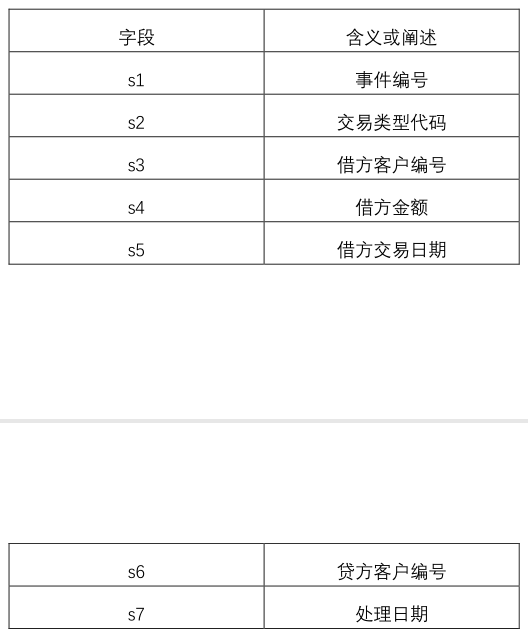

In [65]:
s = pd.read_csv(data_root2+'s.csv')

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
s['s3'].nunique(),s['s6'].nunique(),train['core_cust_id'].nunique(),test['core_cust_id'].nunique()

(136773, 78731, 260814, 112645)

In [72]:
s['month'] = s['s7'].apply(lambda x: int(x.split('-')[1]))

In [76]:
s['month'].unique()

array([4, 6, 2, 5, 7, 9, 3, 1, 8], dtype=int64)

In [79]:
s['s4'] = s['s4'].apply(lambda x:float(x.replace(',','')))

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


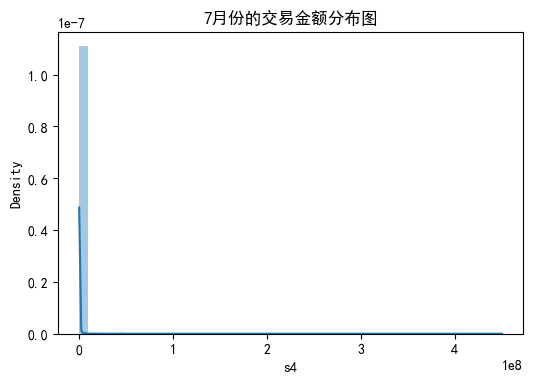

7月份交易的数量为:838653


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


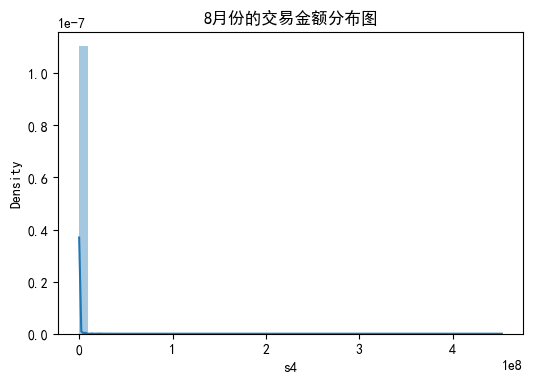

8月份交易的数量为:810973


C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


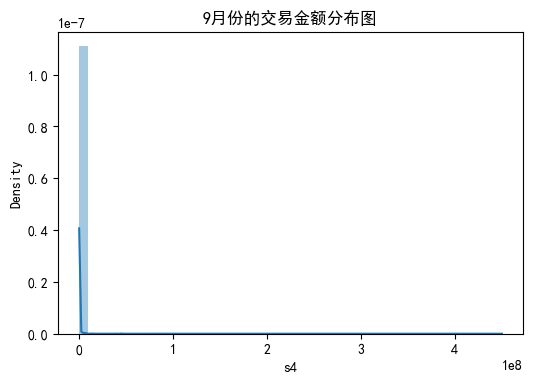

9月份交易的数量为:785160


In [81]:
for month in [7,8,9]:
    temp_df = s.query('month==@month')
    plt.figure(dpi=100)
    sns.distplot(temp_df['s4'])
    plt.title(f'{month}月份的交易金额分布图')
    plt.show()
    print(f'{month}月份交易的数量为:{len(temp_df)}')

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


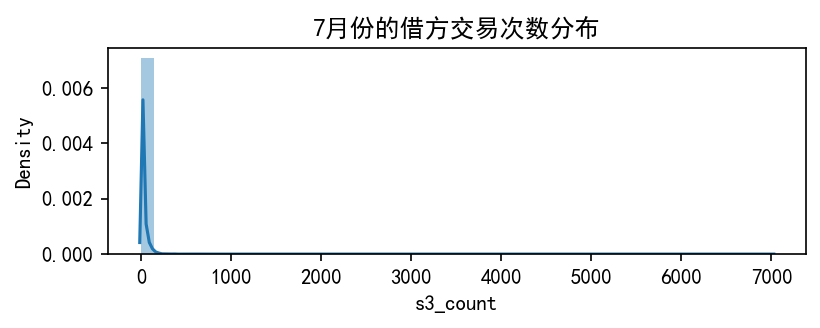

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


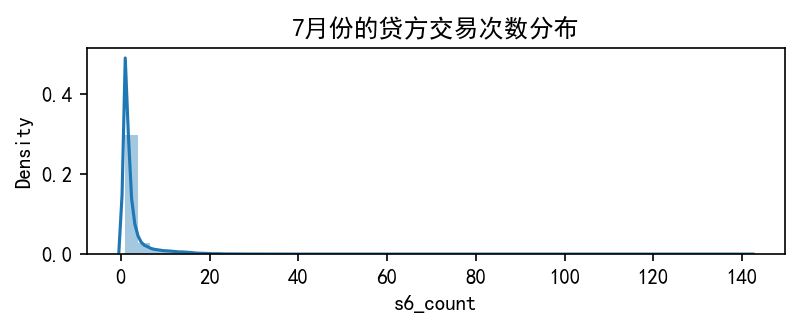

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

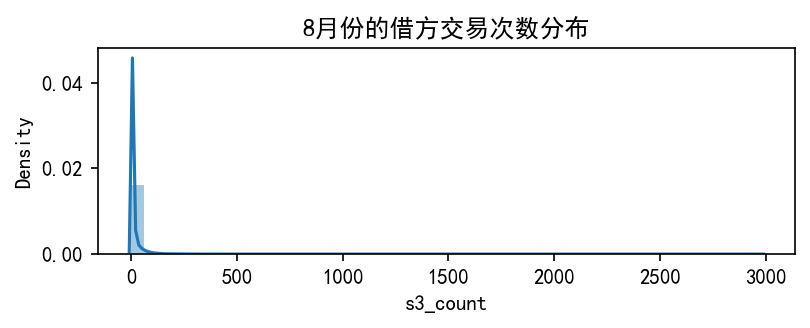

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


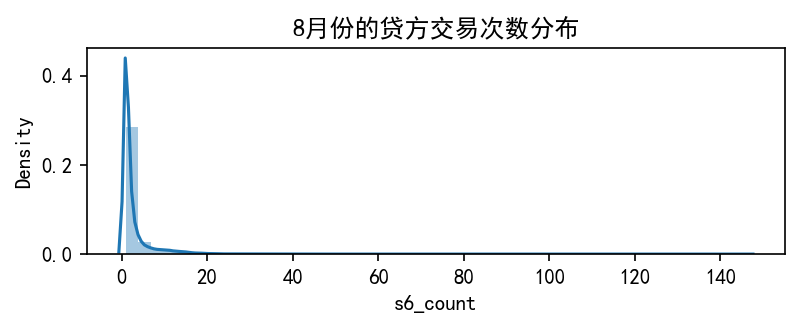

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

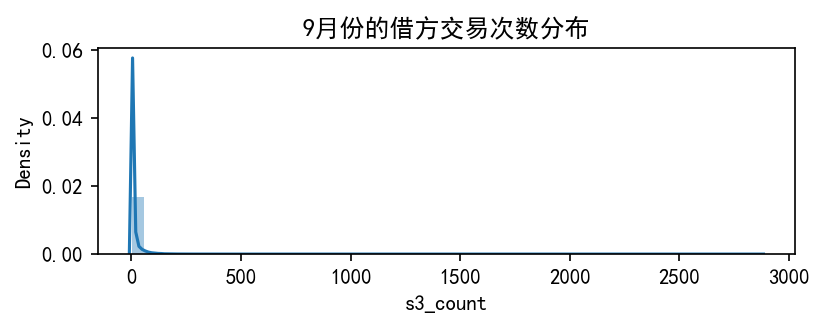

C:\Users\wk\Anaconda\envs\torch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


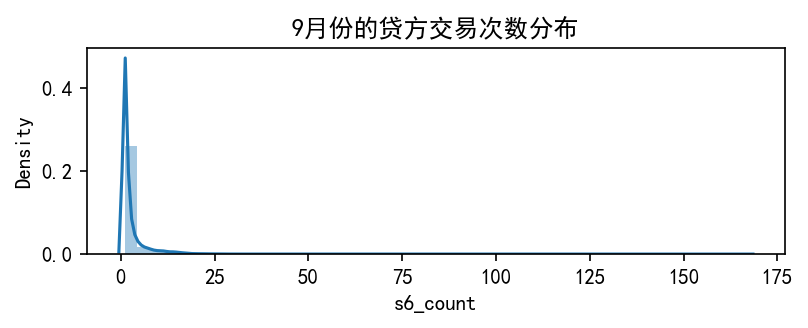

<Figure size 432x288 with 0 Axes>

In [90]:
#统计借方，贷方的交易次数分布情况
for month in [7,8,9]:
    temp_df = s.query('month==@month')
    
    s3_count=temp_df.groupby('s3').agg(s3_count=('s1','count')).reset_index()
    
    s6_count=temp_df.groupby('s6').agg(s6_count=('s1','count')).reset_index()
    
    plt.figure(dpi=150)
    plt.subplot(2,1,1)
    sns.distplot(s3_count['s3_count'])
    plt.title(f'{month}月份的借方交易次数分布')
    plt.show()
    
    plt.figure(dpi=150)
    plt.subplot(2,1,2)
    sns.distplot(s6_count['s6_count'])
    plt.title(f'{month}月份的贷方交易次数分布')
    plt.show()
    
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

# EDA核心总结
## 1.7，8，9，10月的数据分布不同
## 2.用户侧信息较少，产品侧信息较多，历史行为信息较多
## 3.使用历史行为信息的时候，是否要考虑不在主表出现的User和Item？
## 4.app历史信息没有9月份数据